In [247]:
import kaggle
!kaggle competitions download -c tabular-playground-series-mar-2021

tabular-playground-series-mar-2021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [248]:
import os
from zipfile import ZipFile
file = os.listdir()
if "data" in file:
    for i in file:
        if i.endswith(".zip"):
            file_path = os.getcwd()+"/"+i
            ZipFile(file_path).extractall(os.getcwd()+"/data")
else:
    for i in file:
        if i.endswith(".zip"):
            os.makedirs(os.getcwd()+"/data")
            file_path = os.getcwd()+"/"+i
            ZipFile(file_path).extractall(os.getcwd()+"/data")


In [249]:
import pandas as pd
def fetch_data():
    train_data = pd.read_csv(os.getcwd()+"//data/train.csv")
    test_data = pd.read_csv(os.getcwd()+"//data/test.csv")
    sub_data = pd.read_csv(os.getcwd()+"//data/sample_submission.csv")
    return train_data, test_data, sub_data

In [250]:
train_data, test_data, sub_data = fetch_data()

In [251]:
train_data

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,A,N,F,A,E,BU,A,AS,K,...,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,0
299996,499995,A,K,A,A,G,BI,A,K,AE,...,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,0
299997,499996,A,G,M,A,H,BI,C,L,F,...,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,1
299998,499997,B,H,A,D,B,BI,A,AA,AX,...,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,0


In [252]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

In [253]:
train_data.drop('id', axis=1, inplace=True)
train_data.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [254]:
train_data.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


In [255]:
train_data.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64

array([[<AxesSubplot:title={'center':'cont0'}>,
        <AxesSubplot:title={'center':'cont1'}>,
        <AxesSubplot:title={'center':'cont2'}>],
       [<AxesSubplot:title={'center':'cont3'}>,
        <AxesSubplot:title={'center':'cont4'}>,
        <AxesSubplot:title={'center':'cont5'}>],
       [<AxesSubplot:title={'center':'cont6'}>,
        <AxesSubplot:title={'center':'cont7'}>,
        <AxesSubplot:title={'center':'cont8'}>],
       [<AxesSubplot:title={'center':'cont9'}>,
        <AxesSubplot:title={'center':'cont10'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

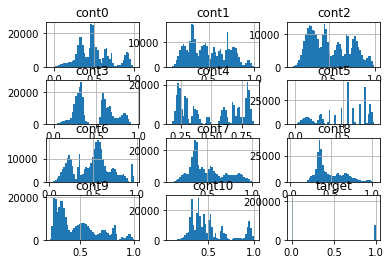

In [256]:
import matplotlib.pyplot as plt
train_data.hist(bins=50)

In [257]:
corr = train_data.corr()
corr['cont1']

cont0     0.474046
cont1     1.000000
cont2     0.861623
cont3     0.256854
cont4     0.133988
cont5     0.185838
cont6     0.116296
cont7     0.581201
cont8     0.672587
cont9     0.393313
cont10    0.471084
target    0.164655
Name: cont1, dtype: float64

In [258]:
num_value_ = [x for x in train_data.columns if train_data[x].dtype != 'O' and x!='target']

In [259]:
train_data["contsum"] = 0
for i in num_value_:
    train_data["contsum"] = train_data['contsum'] + train_data[i]

In [260]:
train_value = [x for x in train_data.columns if x!='target']
test_value = [x for x in train_data.columns if x == 'target']
cat_value = [x for x in train_data.columns if train_data[x].dtype == 'O' and x!='target']
num_value = [x for x in train_data.columns if train_data[x].dtype != 'O' and x!='target']

In [261]:
X_train = train_data[train_value]
y_train = train_data[test_value]

In [262]:
X_train

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,contsum
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,8.174064
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,5.203401
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,5.126590
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,8.147675
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,3.779013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,N,F,A,E,BU,A,AS,K,A,...,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,5.654990
299996,A,K,A,A,G,BI,A,K,AE,E,...,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,6.502314
299997,A,G,M,A,H,BI,C,L,F,A,...,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,5.542772
299998,B,H,A,D,B,BI,A,AA,AX,A,...,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,6.173618


In [263]:
X_train


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,contsum
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,8.174064
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,5.203401
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,5.126590
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,8.147675
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,3.779013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,N,F,A,E,BU,A,AS,K,A,...,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,5.654990
299996,A,K,A,A,G,BI,A,K,AE,E,...,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,6.502314
299997,A,G,M,A,H,BI,C,L,F,A,...,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,5.542772
299998,B,H,A,D,B,BI,A,AA,AX,A,...,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,6.173618


In [264]:
corr = train_data.corr()
corr['target']

cont0     -0.015172
cont1      0.164655
cont2      0.140459
cont3     -0.148316
cont4     -0.075585
cont5      0.215184
cont6      0.189832
cont7     -0.040646
cont8      0.183726
cont9      0.059242
cont10    -0.047077
target     1.000000
contsum    0.100150
Name: target, dtype: float64

In [265]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_value] = sc.fit_transform(X_train[num_value])

d:\my work\kaggle\stock\venv\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [266]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([
    ('encoding', OneHotEncoder(handle_unknown='ignore'), cat_value),
], remainder='passthrough')
X_train = ct.fit_transform(X_train)


In [267]:
X_train


<300000x635 sparse matrix of type '<class 'numpy.float64'>'
	with 9300000 stored elements in Compressed Sparse Row format>

In [268]:
from sklearn.linear_model import SGDClassifier
SGD_clf = SGDClassifier()
SGD_clf.fit(X_train, y_train.values.ravel())


SGDClassifier()

In [269]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(SGD_clf, X_train, y_train, cv=3, scoring="accuracy")

d:\my work\kaggle\stock\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\my work\kaggle\stock\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\my work\kaggle\stock\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [270]:
score

array([0.84114, 0.83762, 0.84341])

In [271]:
print("damn")

damn


In [272]:
X_test = test_data
X_test.drop("id", axis=1, inplace=True)

In [273]:
X_test["contsum"] = 0
for i in num_value:
    X_test["contsum"] = X_test['contsum'] + X_test[i]


In [274]:
X_test[num_value] = sc.transform(X_test[num_value])

In [275]:
X_test = ct.transform(X_test)


In [276]:
X_test

<200000x635 sparse matrix of type '<class 'numpy.float64'>'
	with 6199990 stored elements in Compressed Sparse Row format>

In [277]:
sub_data.drop('id', axis=1, inplace=True)

In [279]:
y_test_pred = SGD_clf.predict(X_test)

In [282]:
submission = pd.DataFrame(y_test_pred, columns=["target"])

In [283]:
submission.to_csv("submission.csv")


In [284]:
sub = pd.read_csv('D:\my work\kaggle\stock\submission.csv')
sub



,Unnamed: 0,target
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
199995,199995,1
199996,199996,0
199997,199997,1
199998,199998,0


In [285]:
sub['id'] = sub['Unnamed: 0'] + 1


In [286]:
sub

,Unnamed: 0,target,id
0,0,0,1
1,1,1,2
2,2,0,3
3,3,0,4
4,4,0,5
...,...,...,...
199995,199995,1,199996
199996,199996,0,199997
199997,199997,1,199998
199998,199998,0,199999


In [287]:
sub.drop('Unnamed: 0', axis=1, inplace=True)


In [288]:
sub.to_csv('submission.csv')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train.values.ravel())